In [18]:
# TODO: Handle leverage by security
# TODO: Handle exposures
# TODO: Replace with true regime model and securities
# TODO: Backtest find the best

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from utility.types import RebalanceFrequencyEnum, AllocationMethodsEnum, RegimeDetectionModels

from data.universe import Universe
from data.benchmark import Benchmark

from backtest.backtest import Backtester
from backtest.reports import plot_from_trade_df, print_portfolio_strategy_report


In [20]:
bench_obj = Benchmark(RebalanceFrequencyEnum.MONTH_END)
bench_obj.benchmark_perf

Date
2019-10-01    0.999993
2019-10-02    0.981493
2019-10-03    0.983629
2019-10-04    0.990607
2019-10-07    0.993187
                ...   
2024-02-09    1.323521
2024-02-12    1.329863
2024-02-13    1.318233
2024-02-14    1.323629
2024-02-15    1.330020
Freq: B, Name: benchmark_perf, Length: 1143, dtype: float64

In [21]:
univ_obj = Universe()
universe = univ_obj.get_universe_returns()
universe

,MONTAIRE,ETF_GROWTH,ETF_VALUE,ETF_CAC,ETF_SPX
date,,,,,
2016-06-01,0.000000,0.000000,0.000000,0.000000,0.000000
2016-06-02,-0.000010,0.004860,0.004419,0.000442,0.003586
2016-06-03,0.000000,-0.010231,-0.005313,-0.009287,-0.017370
2016-06-06,-0.000020,-0.001316,0.014437,0.003236,0.005692
2016-06-07,0.000000,0.006586,0.005512,0.011012,0.005440
...,...,...,...,...,...
2024-02-22,0.000109,0.010694,0.004420,0.012323,0.020330
2024-02-23,0.000119,0.004429,0.000000,0.006920,0.004213
2024-02-26,0.000307,-0.003491,-0.004490,-0.004200,-0.004097


In [22]:
d =univ_obj.get_universe_returns()
d

,MONTAIRE,ETF_GROWTH,ETF_VALUE,ETF_CAC,ETF_SPX
date,,,,,
2016-06-01,0.000000,0.000000,0.000000,0.000000,0.000000
2016-06-02,-0.000010,0.004860,0.004419,0.000442,0.003586
2016-06-03,0.000000,-0.010231,-0.005313,-0.009287,-0.017370
2016-06-06,-0.000020,-0.001316,0.014437,0.003236,0.005692
2016-06-07,0.000000,0.006586,0.005512,0.011012,0.005440
...,...,...,...,...,...
2024-02-22,0.000109,0.010694,0.004420,0.012323,0.020330
2024-02-23,0.000119,0.004429,0.000000,0.006920,0.004213
2024-02-26,0.000307,-0.003491,-0.004490,-0.004200,-0.004097


In [23]:

bk_tester = Backtester(
    universe_returns=univ_obj.get_universe_returns(),
    market_returns=universe["ETF_GROWTH"],
    benchmark_returns=bench_obj.benchmark_returns,
)


ptf_returns_equal_weight, ptf_weights_equal_weight, regimes = bk_tester.run_backtest(
    allocation_type=AllocationMethodsEnum.EQUALLY_WEIGHTED,
    rebalance_frequency=RebalanceFrequencyEnum.QUARTER_START,
    market_regime_model=RegimeDetectionModels.HIDDEN_MARKOV_MODEL,
    transaction_cost_by_securities={k: 0.001 for k in universe.columns},
    verbose=False,
)

ptf_returns_equal_weight.name = "ptf_returns_equal_weight"
# ptf_returns_equal_weight


-------  Returns statistical information  --------
Expected return annualized: 11.79 % vs 9.96 % (buy and hold)
CAGR: 10.47 % vs 8.97 % (buy and hold)
Expected volatility annualized: 19.00 % vs 16.64 % (buy and hold)
Specific volatility (diversifiable) annualized: 10.87 %
Systematic volatility annualized: 15.58 %
Skewness: -0.76 vs -1.01 (buy and hold), <0 = left tail, >0 = right tail
Kurtosis: 12.68 vs -1.01 (buy and hold) , >3 = fat tails, <3 = thin tails
1day-95%-VaR: -1.34 % vs -1.26 % (buy and hold) -> the lower the better
1day-95%-CVaR: -2.48 % vs -2.32 % (buy and hold) -> the lower the better

-------  Strategy statistical information  -------
Max drawdown: -31.57 % vs -25.68 % (buy and hold)
Kelly criterion: 5.34 % vs 5.19 % (buy and hold)
Benchmark sensitivity (beta): 0.94 vs 1 (buy and hold)
Determination coefficient R²: 0.67
Tracking error annualized: 10.92 %

---------------  Strategy ratios  ----------------
No risk free rate considered for the following ratios.

Sharpe r

Loading BokehJS ...

c:\_sharedFS\Ecole\Cross-Asset-Investment-Solutions\Cross-Asset-Investment-Solutions\.venv\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<Axes: xlabel='Date'>

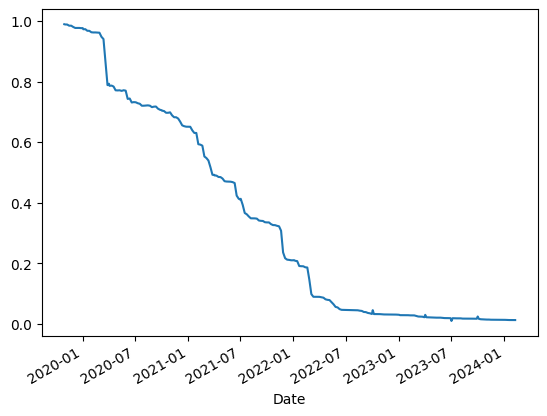

In [24]:
regimes.next_beta.plot()

In [25]:

ptf_and_bench = pd.merge(
    ptf_returns_equal_weight, bench_obj.benchmark_returns, left_index=True, right_index=True
)

ptf_and_bench_perf = (ptf_and_bench + 1).cumprod()
ptf_and_bench_perf

,ptf_returns_equal_weight,benchmark_returns
2019-10-29,1.000443,0.999325
2019-10-30,0.997718,0.999726
2019-10-31,0.993345,0.996922
2019-11-01,0.993345,1.001511
2019-11-04,1.013544,1.007976
...,...,...
2024-02-09,1.345223,1.295178
2024-02-12,1.355076,1.301384
2024-02-13,1.342738,1.290003
2024-02-14,1.349810,1.295284


In [28]:
regimes

,Regime,next_beta
Date,,
2019-10-29,0,0.989296
2019-11-01,0,0.988473
2019-11-08,1,0.988269
2019-11-15,0,0.984457
2019-11-22,1,0.984482
...,...,...
2024-01-12,0,0.013375
2024-01-19,0,0.013137
2024-01-26,0,0.013073


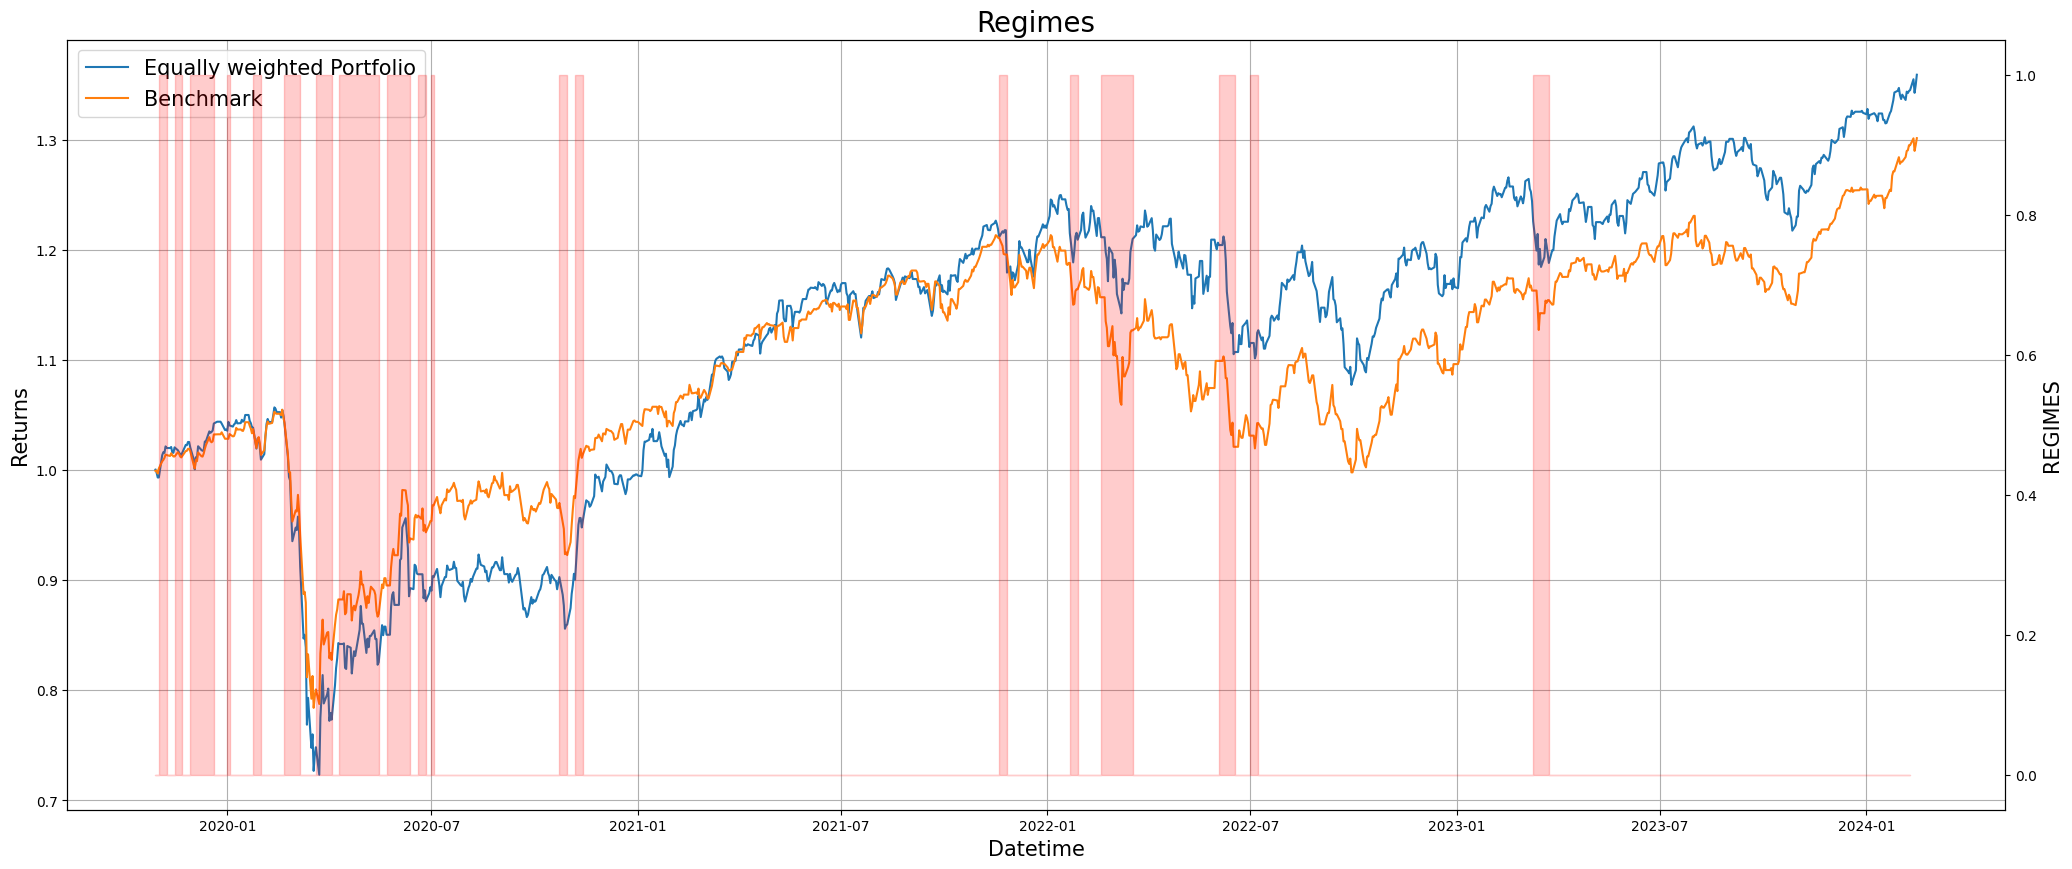

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

ax_l = ax.twinx()
ax_l.fill_between(
    regimes.index,
    regimes["Regime"],
    alpha=0.2,
    color="red",
    step="pre",
)
ax.plot(
    ptf_and_bench_perf["ptf_returns_equal_weight"], label="Equally weighted Portfolio"
)
ax.plot(ptf_and_bench_perf["benchmark_returns"], label="Benchmark")
ax.set_xlabel("Datetime", fontsize=15)
ax.set_ylabel("Returns", fontsize=15)
ax_l.set_ylabel("REGIMES", fontsize=15)
ax.set_title(f"Regimes", fontsize=20)
ax.grid()
ax.legend(fontsize=15)



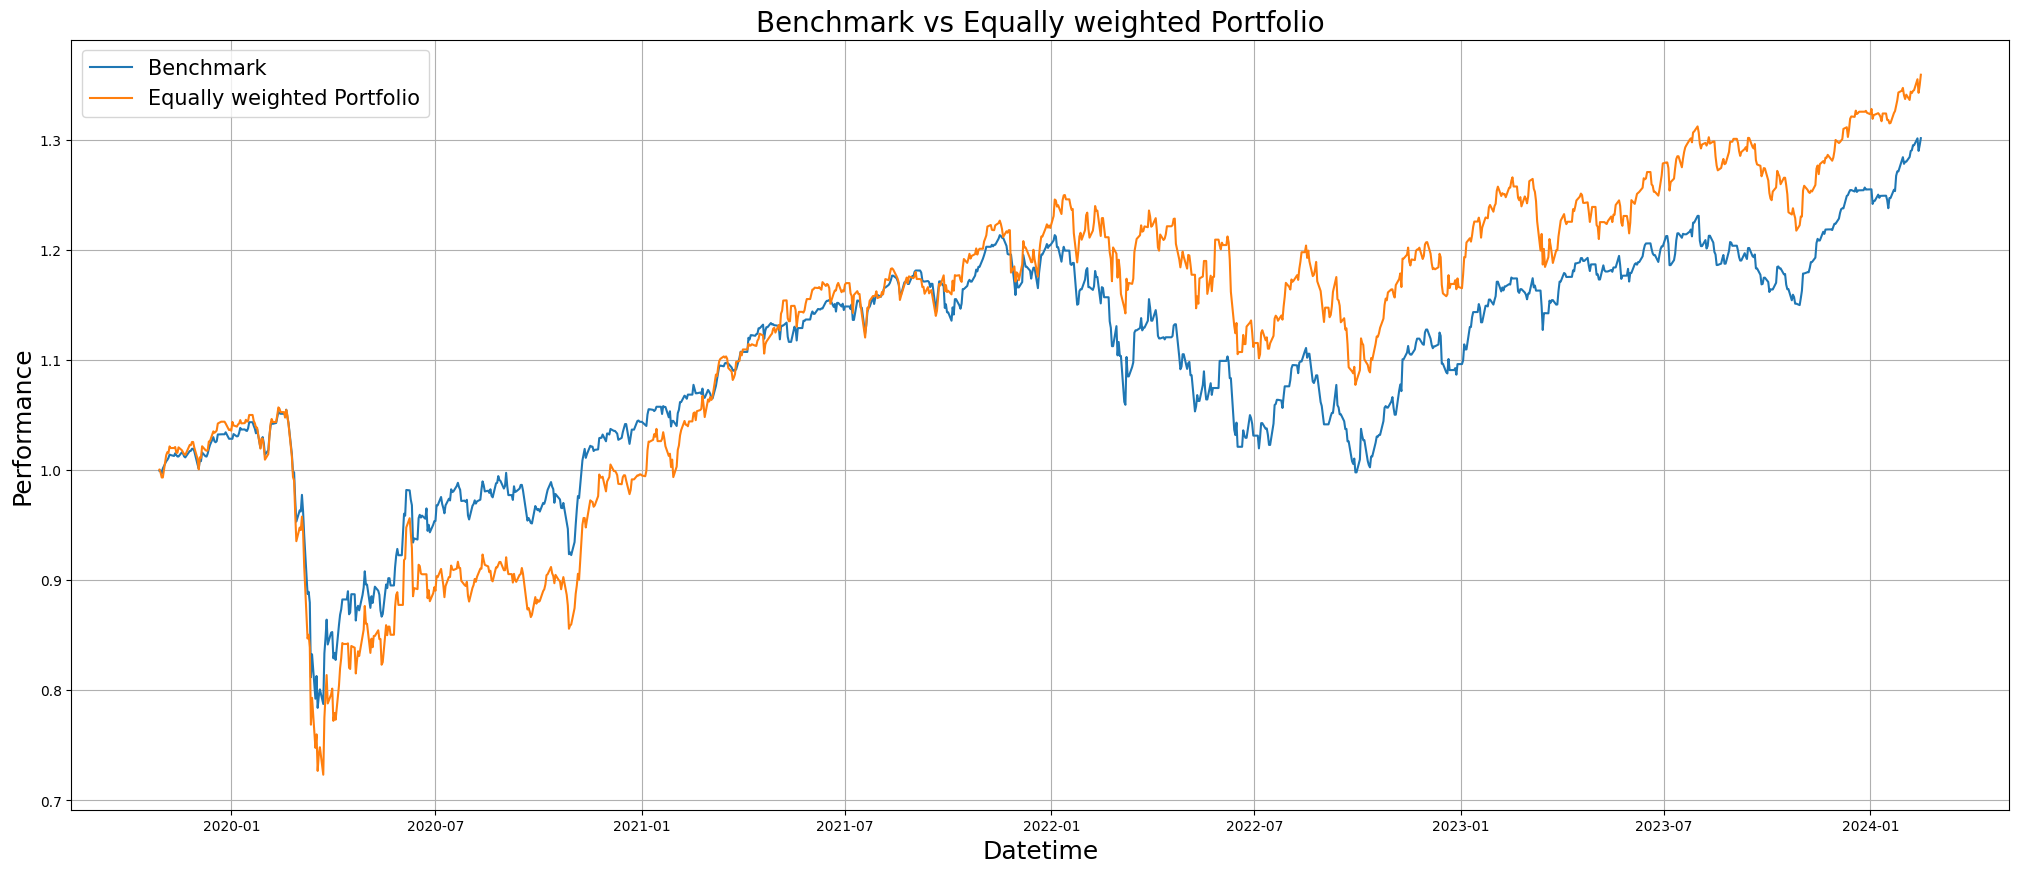

In [26]:
plt.figure(figsize=(25, 10))
plt.plot(ptf_and_bench_perf["benchmark_returns"], label="Benchmark")
# plt.plot(ptf_and_bench_perf["ptf_returns_max_sharpe"], label="Max Sharpe Portfolio")
plt.plot(
    ptf_and_bench_perf["ptf_returns_equal_weight"], label="Equally weighted Portfolio"
)
plt.xlabel("Datetime", fontsize=18)
plt.ylabel("Performance", fontsize=18)
plt.title(
    "Benchmark vs Equally weighted Portfolio",
    fontsize=20,
)
plt.grid()
plt.legend(fontsize=15)

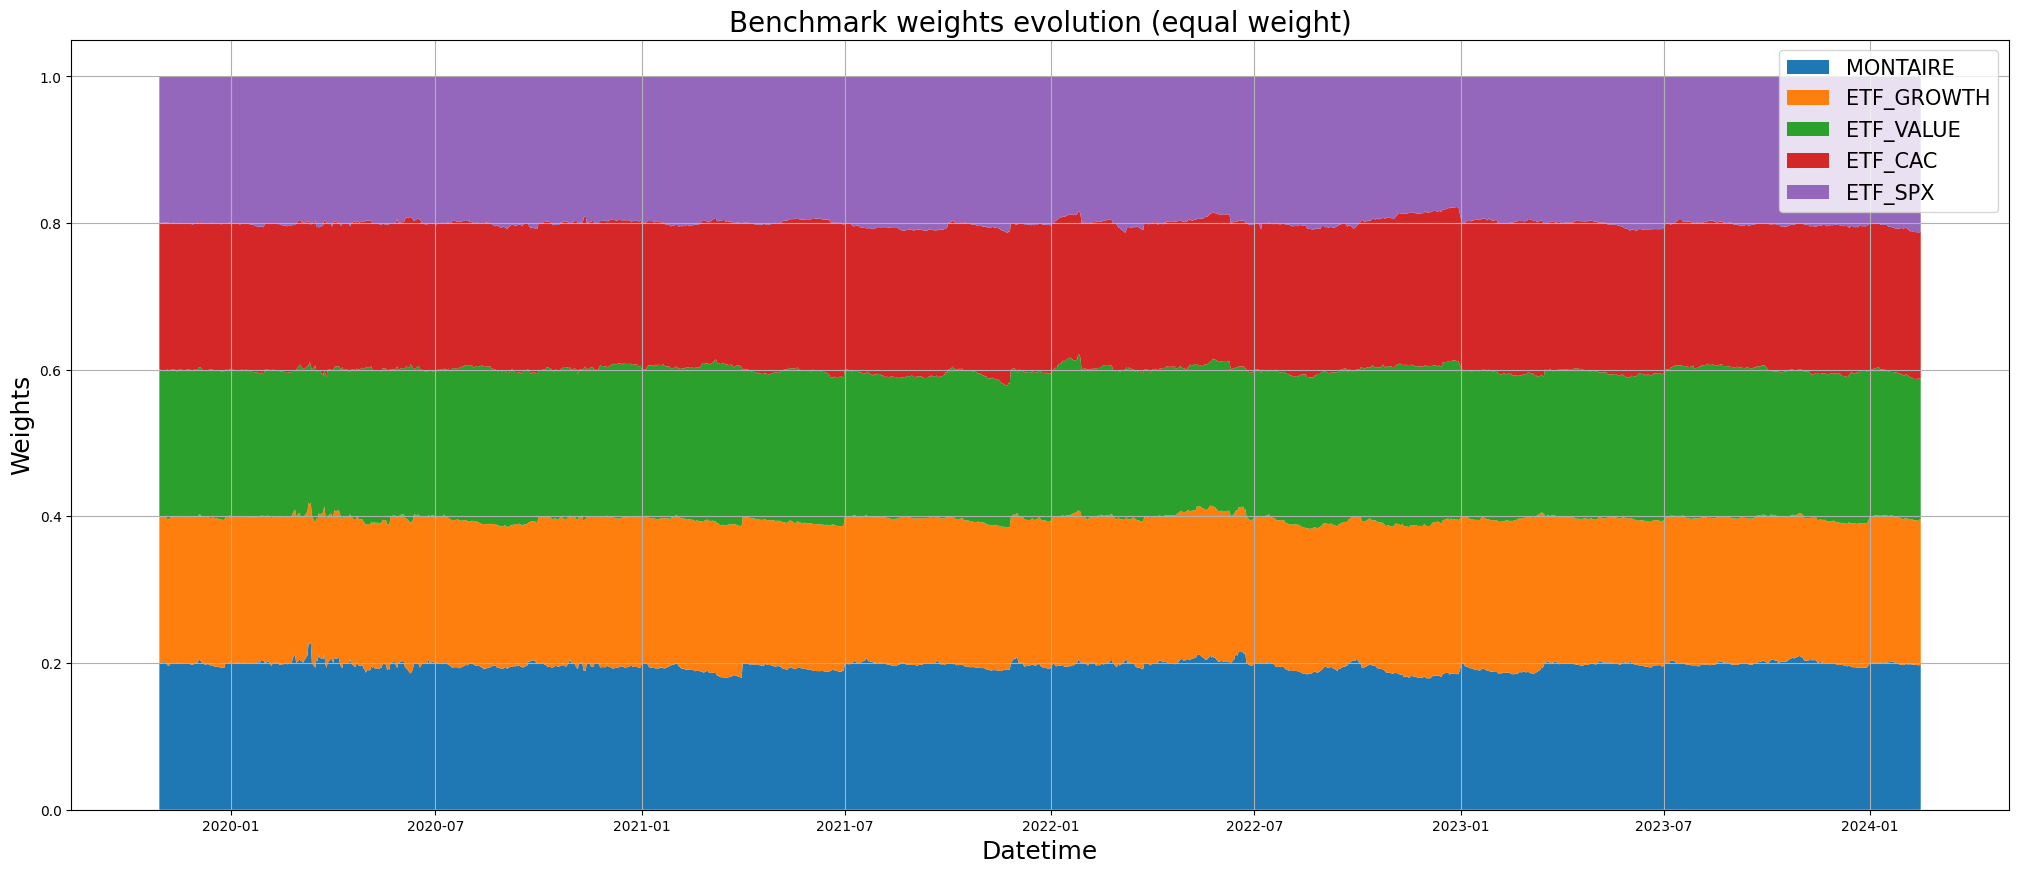

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

ax.stackplot(
    ptf_weights_equal_weight.index,
    ptf_weights_equal_weight.to_numpy().T,
)
ax.set_xlabel("Datetime", fontsize=18)
ax.set_ylabel("Weights", fontsize=18)
ax.set_title("Benchmark weights evolution (equal weight)", fontsize=20)
ax.grid()
ax.legend(ptf_weights_equal_weight.columns.to_list(), fontsize=15)